**MONTHLY AIR PASSENGERS**

Problem Statement: The Air Passenger dataset provides monthly total of US airline passengers, from 1949 to 1960.
This dataset is of a time series class.
Objective:
• Check for the stationarity of your data using Rolling Statistics and Dickey fuller test
• If stationarity is present, remove it using differencing in Python.

In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 
from statsmodels.tsa.stattools import adfuller
import math
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [2]:
#imporing data
df=pd.read_csv("/home/siddharth/Desktop/AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [6]:
df["Month"]= df["Month"].apply(lambda date: datetime(int(date[:4]), int(date[5:]),15))

In [7]:
df['Month']

0     1949-01-15
1     1949-02-15
2     1949-03-15
3     1949-04-15
4     1949-05-15
         ...    
139   1960-08-15
140   1960-09-15
141   1960-10-15
142   1960-11-15
143   1960-12-15
Name: Month, Length: 144, dtype: datetime64[ns]

In [8]:
data=df.set_index(["Month"])

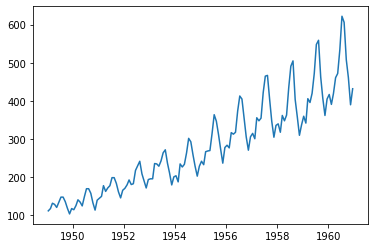

In [9]:
plt.plot(data)

SEASONALITY,UPTREND 

In [10]:
def test_stationary(timeseries):
    #Determining rolling stats 
    rolmean= timeseries.rolling(window=52, center= False).mean()
    rolstd= timeseries.rolling (window=52 , center= False).std()
    #Plotting rolling stats 
    plt.plot(timeseries, color="blue", label="Original")
    plt.plot(rolmean, color="red", label= "Rolmean")
    plt.plot(rolstd, color="green", label= "Rolstd")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Dev")
    plt.show(block=False)
    #Perform Dicky Fuller test:
    print("Results Of DICKY FULLER test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#LagsUsed','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
   

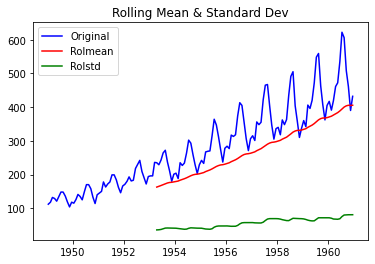

Results Of DICKY FULLER test:
Test Statistic                   0.815369
p-value                          0.991880
#LagsUsed                       13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
test_stationary (data)

IF TEST STATISTIC IS MORE THAN CRITICAL VALUE THEN MOVING AVERAGE IS NOT STATIONARY 
So, the null hypothesis of the Dickey-Fuller test cannot be rejected.
This shows that the time series is not stationary.

<AxesSubplot:xlabel='Month'>

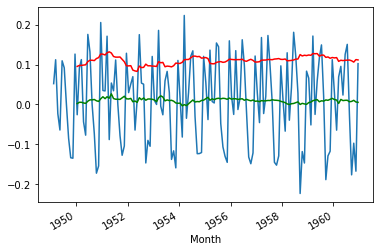

In [58]:
log_diff_data= data["#Passengers"].apply(lambda x : math.log(x)).diff(1)

log_diff_data= log_diff_data.dropna()
log_diff_data.plot()
log_diff_data.rolling(window=12).std().plot(color="red")
log_diff_data.rolling(window=12).mean().plot(color="green")

In [53]:
print(log_diff_data) 

Month
1949-02-15    0.052186
1949-03-15    0.112117
1949-04-15   -0.022990
1949-05-15   -0.064022
1949-06-15    0.109484
                ...   
1960-08-15   -0.026060
1960-09-15   -0.176399
1960-10-15   -0.097083
1960-11-15   -0.167251
1960-12-15    0.102279
Name: #Passengers, Length: 143, dtype: float64


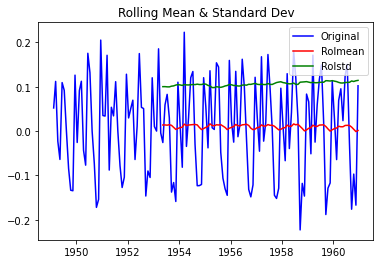

Results Of DICKY FULLER test:
Test Statistic                  -2.717131
p-value                          0.071121
#LagsUsed                       14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [59]:
test_stationary(log_diff_data)

Test-Statistic is now lower than 1% critical value hence we can reject null hypothesis of dicky fuller test therefore 
moving average is stationary.